In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import glob
import os

import cv2
import matplotlib.pyplot as plt

import pickle
import time

%matplotlib inline

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
cats_path = 'processed_train_data/cats'
cats_files = glob.glob(os.path.join(cats_path, "*"))

In [3]:
dogs_path = 'processed_train_data/dogs'
dogs_files = glob.glob(os.path.join(dogs_path, "*"))

In [4]:
dog_marks = [
 'n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978']

cat_marks=['n02123045','n02123159','n02123394','n02123597','n02124075','n02125311','n02127052']

对单个文件进行预测

In [5]:
#参考：https://keras.io/applications/
model = ResNet50(weights='imagenet')
def predict_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds
#preds_cat = predict_img(cats_files[1])

对多个文件进行预测

In [6]:
def predict_imgs(files):
    preds = {}
    i = 0 
    t1 = time.time()
    for file in files:
        pred = predict_img(file)
        preds[file] = pred
        if i%1000==0:
            print ("Predict ",i," files out of ",len(cats_files)," files")  #显示进度
        i+=1 
    t2 = time.time()
    print("Predict time: ",t2-t1)
    
    return preds

对图片文件中的物体进行预测，并导出原始预测值到pickle文件  
 **重要：第二次运行该文件，可以不要运行如下两个代码段，因为第一次已经导出了pickle文件，直接读取就可以了**

In [7]:
"""第二次不执行"""
cats_pickle_file = 'prediction/train_cats_pred.pkl'
if(os.path.exists(cats_pickle_file)):
    raise Exception("file already exists: "+ cats_pickle_file +". If you need to predict again, remove the file first.") 

cats_pred = predict_imgs(cats_files)

with open(cats_pickle_file, 'wb') as file:
    pickle.dump(cats_pred, file)

Predict  0  files out of  12500  files
Predict  1000  files out of  12500  files
Predict  2000  files out of  12500  files
Predict  3000  files out of  12500  files
Predict  4000  files out of  12500  files
Predict  5000  files out of  12500  files
Predict  6000  files out of  12500  files
Predict  7000  files out of  12500  files
Predict  8000  files out of  12500  files
Predict  9000  files out of  12500  files
Predict  10000  files out of  12500  files
Predict  11000  files out of  12500  files
Predict  12000  files out of  12500  files
Predict time:  436.025865316391


In [8]:
"""第二次不执行"""
dogs_pickle_file = 'prediction/train_dogs_pred.pkl'
if(os.path.exists(dogs_pickle_file)):
    raise Exception("file already exists: "+ dogs_pickle_file +". If you need to predict again, remove the file first.") 
    
dogs_pred = predict_imgs(dogs_files)

with open(dogs_pickle_file, 'wb') as file:
    pickle.dump(dogs_pred, file)

Predict  0  files out of  12500  files
Predict  1000  files out of  12500  files
Predict  2000  files out of  12500  files
Predict  3000  files out of  12500  files
Predict  4000  files out of  12500  files
Predict  5000  files out of  12500  files
Predict  6000  files out of  12500  files
Predict  7000  files out of  12500  files
Predict  8000  files out of  12500  files
Predict  9000  files out of  12500  files
Predict  10000  files out of  12500  files
Predict  11000  files out of  12500  files
Predict  12000  files out of  12500  files
Predict time:  435.63645362854004


如果已经导出过pkl，第二次可节约时间，不再导出直接读取

In [9]:
cats_pred ={}
with open('prediction/train_cats_pred.pkl', 'rb') as file:
    cats_pred = pickle.load(file)

In [10]:
dogs_pred ={}
with open('prediction/train_dogs_pred.pkl', 'rb') as file:
    dogs_pred = pickle.load(file)

In [11]:
def get_pred_top(pred,nb_top=10):
    top = {}
    for k in pred:
        preds = (pred[k])
        decode_preds = decode_predictions(preds, top=nb_top)[0]
        pred_dict = {}
        for dic in decode_preds:
            pred_dict[dic[0]] = dic[2]
        top[k] = pred_dict
    
    return top

获取预测的前几项

In [12]:
cats_top = get_pred_top(cats_pred,nb_top=100)
dogs_top = get_pred_top(dogs_pred,nb_top=20)

判断是否存在属于猫，或者狗的

In [13]:
def get_abnormal_img(pred_top,marks):
    abnormal_files = []
    i = 0
    for file in pred_top:
        dic = {}
        prob = 0.0
        for mark in pred_top[file]: 
            if mark in marks:
                prob = prob + pred_top[file][mark]
        if prob == 0:
            dic[file] = prob
            abnormal_files.append(dic)
        i += 1
        """
        if i >100:
            break     
        """
    return abnormal_files

In [14]:
abnormal_cats = get_abnormal_img(cats_top,cat_marks)
abnormal_dogs = get_abnormal_img(dogs_top,dog_marks)

In [15]:
print(len(abnormal_cats))
print(len(abnormal_dogs))

49
40


In [16]:
def showimgs(imgs,titles):
    col = len(imgs)
    for i in range(col):
        plt.subplot(1,col,i+1)
        plt.imshow(imgs[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [17]:
def show_abnormal_imgs(img_files):
    all_fname = []
    i=0
    l=0
    col = 3
    imgs = []
    titles = []
    for dic in img_files:
        file = list(dic.keys())[0]
        title = os.path.split(file)[1]
        #title = file.rsplit('/',1)[1] #去掉路径，获取文件名
        img = cv2.imread(file)
        imgs.append(img)
        titles.append(title)
        all_fname.append(title)
        i = i+1
        l = l+1
        if i%col ==0:
            showimgs(imgs,titles)
            i = 0
            imgs = []
            titles = []
        elif l == len(img_files):
            showimgs(imgs,titles)
    return all_fname

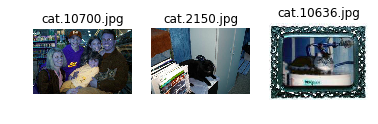

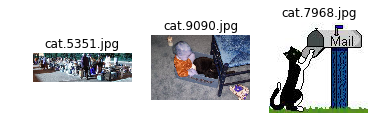

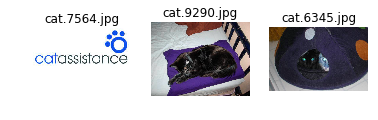

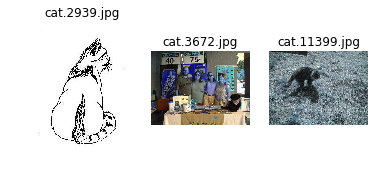

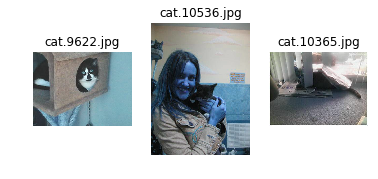

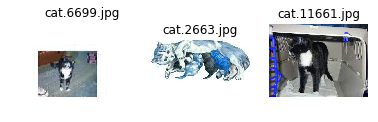

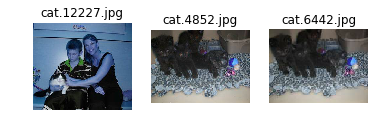

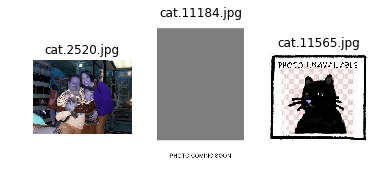

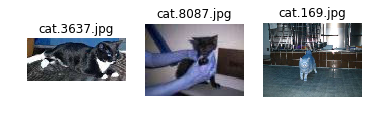

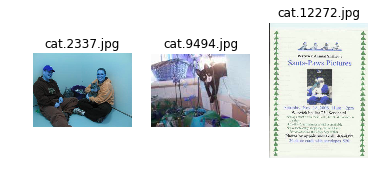

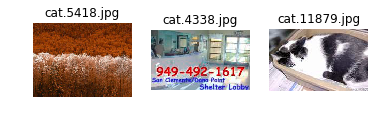

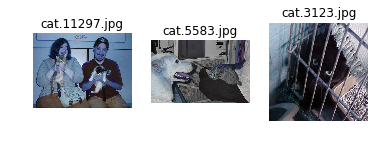

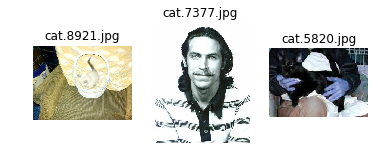

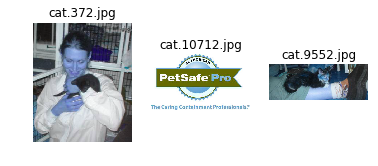

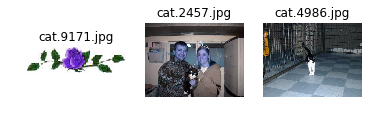

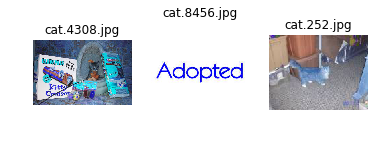

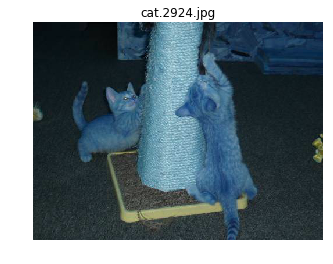

In [18]:
cats_fnames = show_abnormal_imgs(abnormal_cats)

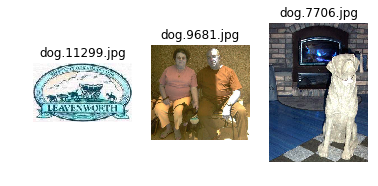

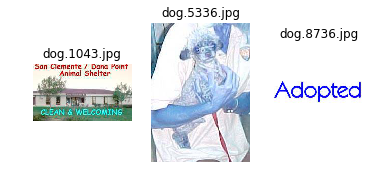

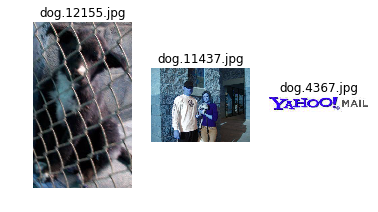

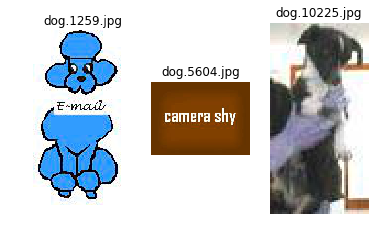

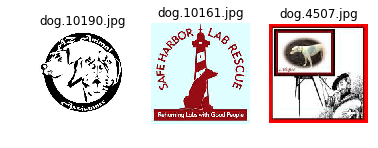

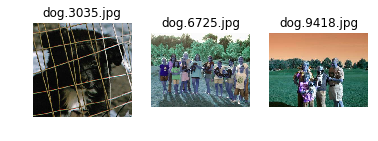

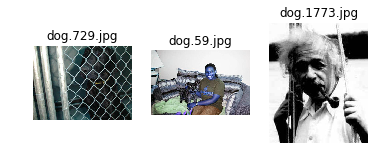

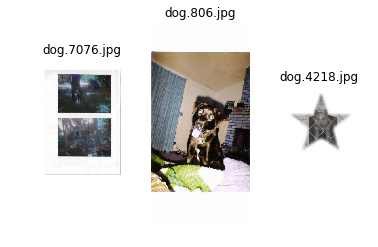

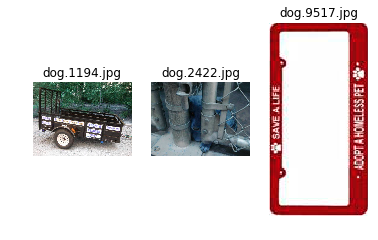

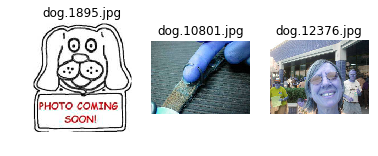

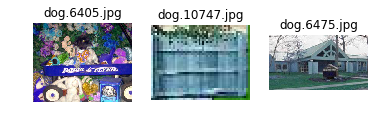

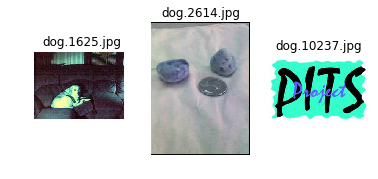

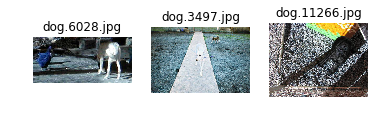

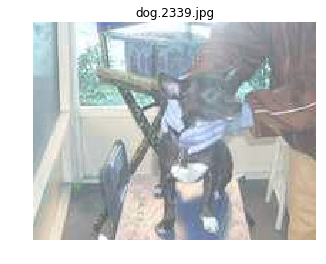

In [19]:
dogs_fnames = show_abnormal_imgs(abnormal_dogs)

In [21]:
print("abnormal_cats:",cats_fnames)
print("abnormal_dogs:",dogs_fnames)

abnormal_cats: ['cat.10700.jpg', 'cat.2150.jpg', 'cat.10636.jpg', 'cat.5351.jpg', 'cat.9090.jpg', 'cat.7968.jpg', 'cat.7564.jpg', 'cat.9290.jpg', 'cat.6345.jpg', 'cat.2939.jpg', 'cat.3672.jpg', 'cat.11399.jpg', 'cat.9622.jpg', 'cat.10536.jpg', 'cat.10365.jpg', 'cat.6699.jpg', 'cat.2663.jpg', 'cat.11661.jpg', 'cat.12227.jpg', 'cat.4852.jpg', 'cat.6442.jpg', 'cat.2520.jpg', 'cat.11184.jpg', 'cat.11565.jpg', 'cat.3637.jpg', 'cat.8087.jpg', 'cat.169.jpg', 'cat.2337.jpg', 'cat.9494.jpg', 'cat.12272.jpg', 'cat.5418.jpg', 'cat.4338.jpg', 'cat.11879.jpg', 'cat.11297.jpg', 'cat.5583.jpg', 'cat.3123.jpg', 'cat.8921.jpg', 'cat.7377.jpg', 'cat.5820.jpg', 'cat.372.jpg', 'cat.10712.jpg', 'cat.9552.jpg', 'cat.9171.jpg', 'cat.2457.jpg', 'cat.4986.jpg', 'cat.4308.jpg', 'cat.8456.jpg', 'cat.252.jpg', 'cat.2924.jpg']
abnormal_dogs: ['dog.11299.jpg', 'dog.9681.jpg', 'dog.7706.jpg', 'dog.1043.jpg', 'dog.5336.jpg', 'dog.8736.jpg', 'dog.12155.jpg', 'dog.11437.jpg', 'dog.4367.jpg', 'dog.1259.jpg', 'dog.5604.j